<h1>
    <br style ="font-family:UCL-SoM-Outline;color:#EA7600"> Individual Coursework </br> 
    </p>
</h1>
      <h4>
          <p style="font-size:18pt">MSIN0097 Predictive Analytics</p>
      </h4>


# COURSEWORK: WARNER MUSIC



### PREDICTING THE SUCCESS OF ARTISTS ON SPOTIFY

Please complete the sections of this Notebook with supporting code and markup analysis where appropriate. During this coursework you will:

- Understand the specific business forecast task 
- Prepare a dataset, clean and impute where necessary 
- Train an ensemble classifier 
- Evaluate the performance and comment of success and failure modes
- Complete all necessary stages of the data science process 

2000 words plus code, markup text within cells of the Notebook. 

This is approximately 100 words per ACTION cell, but use the wordcount over the duration of the Notebook at your discretion. 


# Assessement 

** Assessment Deadlines **

Please see the Business Analytics tab on the School of Management Student Information Centre for full details of coursework submission deadlines.

- 21/02/2019

**Assessment Type**: 

- 60% Individual Coursework of 2000 words plus code, markup text within cells of the Notebook. Approximately 100 words per ACTION cell. 


## 0. Business Case Understanding

### INTRODUCTION

Over the last few years, the music industry has been dominated by digital streaming services, which produce vast amounts of data on listeners and their preferences. 

This has required major players in the industry to adopt a data driven approach to content delivery in order to stay competitive. 

Warner Music Group is looking to leverage its rich database to better understand the factors that have the most significant impact on the success of a new artist. This will allow them to optimize the allocation of resources when signing and promoting new artists.

Warner’s (large) database contains several sources of data, including the streaming platforms Spotify, Amazon Live and Apple Music. 

For this case study, we will be looking using the Spotify dataset to predict the success of artists. In particular, we want to understand the role of Spotify playlists on the performance of artist.

### Streaming Music

When artists release music digitally, details of how their music is streamed can be closely monitored. 

Some of these details include:

- How listeners found their music (a recommendation, a playlist)
- Where and when (a routine visit to the gym, a party, while working). 
- On what device (mobile / PC)
- And so on…

Spotify alone *process nearly 1 billion streams every day* (Dredge, 2015) and this streaming data is documented in detail every time a user accesses the platform. 

Analyzing this data potentially enables us to gain a much deeper insight into customers’ listening behavior and individual tastes. 

Spotify uses it to drive their recommender systems – these tailor and individualize content as well as helping the artists reach wider and more relevant audiences. 

Warner Music would like to use it to better understand the factors that influence the *future success of its artists*, *identify potentially successful acts* early on in their careers and use this analysis to make resource decisions about how they market and support their artists.

### What are Spotify Playlists and why are relevant today?

A playlist is a group of tracks that you can save under a name, listen to, and update at your leisure. 


Spotify currently has more than two billion publicly available playlists, many of which are curated by Spotify’s in-house team of editors. 

The editors scour the web on a daily basis to remain up-to-date with the newest releases, and to create playlists geared towards different desires and needs. 

Additionally, there are playlists such as [Discover Weekly](https://www.spotify.com/uk/discoverweekly/) and [Release Radar](https://support.spotify.com/uk/using_spotify/playlists/release-radar/) that use self-learning algorithms to study a user’s listening behavior over time and recommend songs tailored to his/her tastes.
	
The figure below illustrates the progression of artists on Spotify Playlists:

The artist pool starts off very dense at the bottom, as new artists are picked up on the smaller playlists, and thins on the way to the top, as only the most promising of them make it through to more selective playlists. The playlists on the very top contain the most successful, chart-topping artists.

An important discovery that has been made is that certain playlists have more of an influence on the popularity, stream count and future success of an artist than others. 

Moreover, some playlists have been seen to be pivotal in the careers of successful artists. Artists that do make it onto one of these *key* playlists frequently go on to become highly ranked in the music charts. 

It is the objective of Warner’s [A&R](https://en.wikipedia.org/wiki/Artists_and_repertoire) team to identify and sign artists before they achieve this level of success i.e. before they get selected for these playlists, in order to increase their ROI. 

### BUSINESS PROBLEM → DATA PROBLEM

Now that we have a better understanding of the business problem, we can begin to think about how we could model this problem using data. 

The first thing we can do is defining a criterion for measuring artist success. 

Based on our business problem, one way in which we can do this is to **create a binary variable representing the success / failure of an artist and determined by whether a song ends up on a key playlist (1), or not (0). We can then generate features for that artist to determine the impact they have on the success of an artist.**

Our problem thus becomes a classification task, which can be modeled as follows:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*

where,

**Success (1) = Artist Features on Key Playlist**

**The key playlists we will use for this case study are the 4 listed below, as recommended by Warner Analysts:**

1.	Hot Hits UK
2.	Massive Dance Hits
3.	The Indie List
4.	New Music Friday


The coursework task is to take a look at the Spotify dataset to see how we might be able to set up this classification model.

Complete the code sections below to work through the project from start to finish. 
<br>

## 1. Prepare the problem 

Run your code on Sherlock. We have prepared some of the data for you already. 

In addition, we have imported a custom module (spotfunc.py) containing useful functions written for this dataset.

In [0]:
# Preamble 

#import sherlockml.datasets as sfs
import pandas as pd
import random

#sfs.get('/input/spotfunc.py', 'spotfunc.py')
#sfs.get('/input/playlists_ids_and_titles.csv', 'playlists_ids_and_titles.csv')
#sfs.get('/input/newartists2015onwards.csv', 'newartists2015onwards.csv')
#sfs.get('/input/cleaned_data.csv', 'cleaned_data.csv')

In [0]:
# Import all required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls "/content/gdrive/My Drive/Coursework Notebook/Coursework Notebook"

 all_artists_2.csv
 all_artists_2.hyper
 cleaned_data.csv
 figures
'MSIN0097 Individual Coursework Rubric .docx'
'MSIN0097 Predictive Analytics Individual Coursework.docx'
 newartists2015onwards.csv
 playlists_ids_and_titles.csv
 spotfunc.py
'Warner Music Case Study-Coursework.ipynb'
'Warner Music Case Study-Coursework - 初稿.ipynb'
'Warner Music Case Study-Coursework - 空.ipynb'


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Coursework Notebook/Coursework Notebook/cleaned_data.csv')
playlist_ids_and_titles = pd.read_csv('/content/gdrive/My Drive/Coursework Notebook/Coursework Notebook/playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)



## 2. Data Understanding

<br>
A year’s worth of Spotify streaming data in the WMG database amounts to approximately 50 billion rows of data i.e. 50 billion streams (1.5 to 2 terabytes worth), with a total of seven years of data stored altogether (2010 till today).

For the purposes of this case study, we will be using a sample of this data. The dataset uploaded on the Sherlock server is about 16GB, containing data from 2015 - 2017. Given the limits on RAM and cores, we will be taking **a further sample of this data for purposes of this case study: a 10% random sample of the total dataset, saved as 'cleaned_data.csv'.** 

*Note: The code for this sampling in included below, but commented out.*

**We can begin with reading in the datasets we will need. We will be using 2 files:** 
1. Primary Spotify dataset **(all_artists_2)**
2. Playlist Name Mapper (only playlist IDs provided in primary dataset) **(playlist_mapper_clean)**



In [0]:
# %%time
# Sampling data to read in 10% 
# sfs.get('/input/all_artists_with_date_time_detail.csv', 'client-data.csv')
# # Read in data
# # The data to load
# f = 'client-data.csv'
# # Count the lines
# num_lines = sum(1 for l in open(f))
# n = 10
# # Count the lines or use an upper bound
# num_lines = sum(1 for l in open(f))
# # The row indices to skip - make sure 0 is not included to keep the header!
# skip_idx = [x for x in range(1, num_lines) if x % n != 0]
# # Read the data
# data = pd.read_csv(f, skiprows=skip_idx )

Read in the data

In [0]:
#%%time
# Read in sampled data
#data = pd.read_csv('cleaned_data.csv')
print('rows:',len(data))

# Load playlist data
#playlist_ids_and_titles = pd.read_csv('playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)

# Keep only those with 22 characters (data cleaning)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])

rows: 3805499


In [0]:
# Keep a copy of original data in case of changes made to dataframe
all_artists = data.copy()
playlist_mapper_clean = playlist_mapper.copy()

### EXPLORATORY ANALYSIS AND PLOTS


In this section, the primary spotify dataset will be examined first and the data structure of the playlist name mapper will be examined at the end of the section.

# **all_artists** - The Primary Spotify Dataset

In [0]:
#check data structure
all_artists.shape

(3805499, 45)

In [0]:
#check all column names
all_artists.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time',
       'mobile', 'track_id', 'isrc', 'upc', 'artist_name', 'track_name',
       'album_name', 'customer_id', 'postal_code', 'access', 'country_code',
       'gender', 'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name'],
      dtype='object')

**The columns *focus* on for this case study are:**

* Log Time – timestamp of each stream
* Artist Name(s) – some songs feature more than one artist
* Track Name
* ISRC - (Unique code identifier for that version of the song, i.e. radio edit, album version, remix etc.)
* Customer ID
* Birth Year
* Location of Customer
* Gender of Customer
* Stream Source URI – where on Spotify was the song played – unique playlist ID, an artist’s page, an album etc.


In [0]:
#re-arrange columns' order
all_artists_2 = all_artists[['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'log_time' , 'DateTime', 'date', 'year', 'month', 'day', 'week', 'weekday', 'weekday_name', 'hour', 'minute', 'artist_name', 'track_name', 'track_id', 'album_name', 'isrc', 'customer_id', 'birth_year', 'gender', 'postal_code', 'region_code', 'country_code', 'stream_source_uri', 'mobile', 'playlist_id', 'playlist_name', 'upc', 'access', 'filename', 'referral_code', 'partner_name', 'financial_product', 'user_product_type', 'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source', 'stream_device', 'stream_os', 'track_uri', 'track_artists', 'source']]


In [0]:
#format artist_name column into lower cases
import string
all_artists_2['artist_name'] = all_artists_2['artist_name'].apply(lambda x:''.join([i for i in x
                                                  if i not in string.punctuation])).str.lower().str.strip()

In [0]:
#check new column order
all_artists_2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'log_time', 'DateTime',
       'date', 'year', 'month', 'day', 'week', 'weekday', 'weekday_name',
       'hour', 'minute', 'artist_name', 'track_name', 'track_id', 'album_name',
       'isrc', 'customer_id', 'birth_year', 'gender', 'postal_code',
       'region_code', 'country_code', 'stream_source_uri', 'mobile',
       'playlist_id', 'playlist_name', 'upc', 'access', 'filename',
       'referral_code', 'partner_name', 'financial_product',
       'user_product_type', 'offline_timestamp', 'stream_length',
       'stream_cached', 'stream_source', 'stream_device', 'stream_os',
       'track_uri', 'track_artists', 'source'],
      dtype='object')

In [0]:
#check data type of each column
all_artists_2.dtypes

Unnamed: 0             int64
Unnamed: 0.1           int64
Unnamed: 0.1.1        object
log_time              object
DateTime              object
date                  object
year                   int64
month                  int64
day                    int64
week                   int64
weekday                int64
weekday_name          object
hour                   int64
minute                 int64
artist_name           object
track_name            object
track_id              object
album_name            object
isrc                  object
customer_id           object
birth_year           float64
gender                object
postal_code           object
region_code           object
country_code          object
stream_source_uri     object
mobile                  bool
playlist_id           object
playlist_name         object
upc                  float64
access                object
filename              object
referral_code        float64
partner_name          object
financial_prod

In [0]:
#check the total number of NaN in each column, there are multiply columns with missing values.
all_artists_2.isna().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
Unnamed: 0.1.1             0
log_time                   0
DateTime                   0
date                       0
year                       0
month                      0
day                        0
week                       0
weekday                    0
weekday_name               0
hour                       0
minute                     0
artist_name                0
track_name                 0
track_id                   0
album_name                 0
isrc                       4
customer_id                0
birth_year             10021
gender                 40422
postal_code          1352181
region_code           261956
country_code               0
stream_source_uri    2761628
mobile                     0
playlist_id          2761628
playlist_name        2826389
upc                        0
access                     0
filename                   0
referral_code        3805499
partner_name         3378646
financial_prod

In [0]:
#check duplicated entries of the dataset, the result shows no duplicated entries
all_artists_2.duplicated().value_counts(dropna=False)

False    3805499
dtype: int64

In [0]:
all_artists_2.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,log_time,DateTime,date,year,month,day,week,...,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_device,stream_os,track_uri,track_artists,source
0,0,9,"('small_artists_2016.csv', 9)",20160510T12:15:00,2016-05-10 12:15:00,2016-05-10,2016,5,10,19,...,ad,NaN,277.0,NaN,album,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN
1,1,19,"('small_artists_2016.csv', 19)",20160510T12:15:00,2016-05-10 12:15:00,2016-05-10,2016,5,10,19,...,ad,NaN,53.0,NaN,album,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN
2,2,29,"('small_artists_2016.csv', 29)",20160510T14:00:00,2016-05-10 14:00:00,2016-05-10,2016,5,10,19,...,paid,NaN,326.0,NaN,collection,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN


**Each row in the data is a unique stream – every time a user streams a song in the Warner Music catalogue for at least 30 seconds it becomes a row in the database. Each stream counts as a ‘transaction’, the value of which is £0.0012, and accordingly, 1000 streams of a song count as a ‘sale’ (worth £1) for the artist. The dataset is comprised of listeners in Great Britain only.**

Not all the columns provided are relevant to us. Lets take a look at some basic properties of the dataset, and identify the columns that are important for this study


In [0]:
#check country distribution 
all_artists.country_code.value_counts(dropna=False)

GB    3805499
Name: country_code, dtype: int64

In [0]:
#calculate total transaction value of the dataset, the results shows that the whole dataset worths a value of £4566.60 to Warner Music
len(all_artists) *  0.0012

4566.5988

In [0]:
#check the time span of the dataset
print(sorted(all_artists_2.year.unique()))

[2014, 2015, 2016, 2017]


The graph below shows that there was a sharp increase in stream count from 2015 to 2016. This can suggest that Spotify streaming becomes extremly popular since 2015.

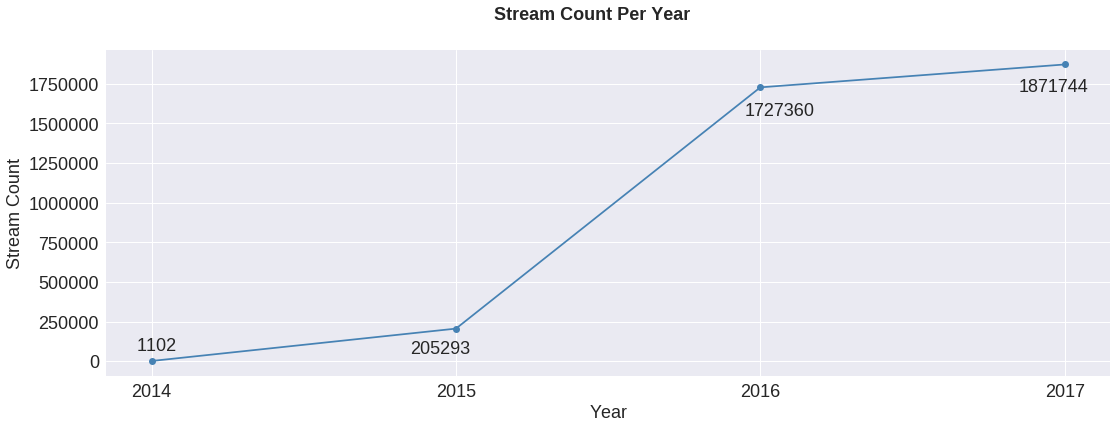

In [0]:
fig = plt.figure()
fig.suptitle('Stream Count Per Year', fontsize=18, fontweight='bold')
all_artists_2.year.value_counts(dropna=False).plot(kind='line', figsize=(18, 6), rot=0, fontsize=18, marker='o', colors=['steelblue'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stream Count', fontsize=18)
plt.xticks(np.arange(2014, 2018, 1))
plt.text(2013.95,70000,"1102",fontsize=18)
plt.text(2014.85,50000,"205293",fontsize=18)
plt.text(2015.95,1550000,"1727360",fontsize=18)
plt.text(2016.85,1700000,"1871744",fontsize=18)
plt.show()

The pie chart below shows that the gender distribution among the streams in the dataset is fairly equal. In general, females (51.94%) tend to stream slightly more than males do (48.06%).

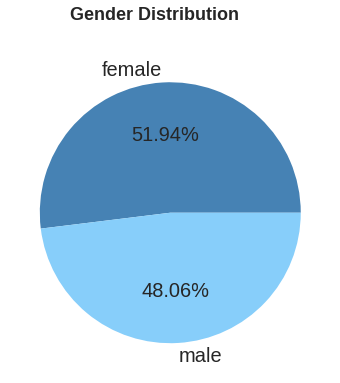

In [0]:
fig = plt.figure()
fig.suptitle('Gender Distribution', fontsize=18, fontweight='bold')
all_artists_2.gender.value_counts().plot(kind='pie',autopct = '%3.2f%%', fontsize=20, figsize=(18, 6), colors=['steelblue', 'lightskyblue'])
plt.ylabel('', fontsize=18)
plt.show()

In [0]:
#people borned after year 1990 form the top 10 most-streamed listener groups
all_artists_2.birth_year.value_counts(dropna=False).head(10)

1997.0    275327
1996.0    274611
1995.0    265162
1998.0    250556
1994.0    213865
1999.0    208934
1990.0    204481
2000.0    197922
1993.0    176516
1992.0    167489
Name: birth_year, dtype: int64

The distribution plot below shows that listeners' birth year is highly distributed between year 1980 and 2000. In other words, adults and young adults form the major stream group in the dataset. 

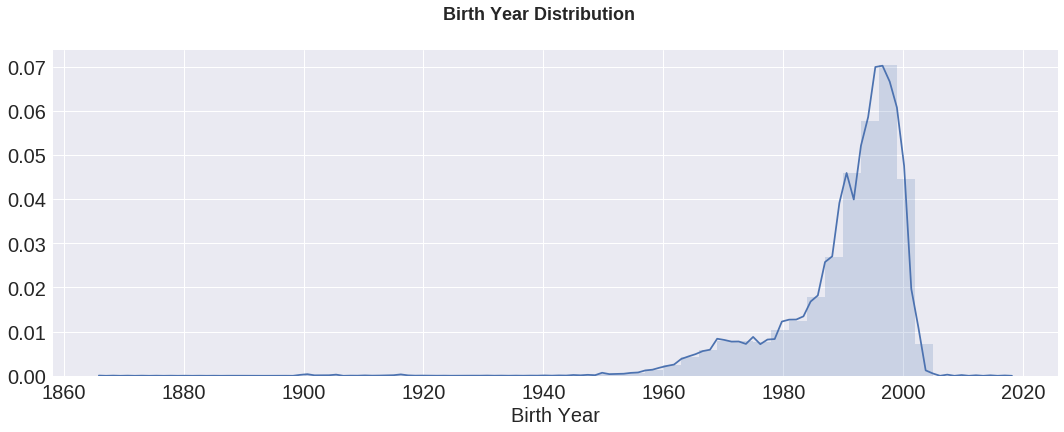

In [0]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Birth Year Distribution', fontsize=18, fontweight='bold')
sns.distplot(all_artists_2['birth_year'], bins=50, hist_kws={'alpha': 0.2})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Birth Year', fontsize=20)
plt.show()

Given the dataset, the horizontal bar chart below lists the top 10 most-streamed artists. Charlie Puth ranks at top 1 with an over 400000 streams.

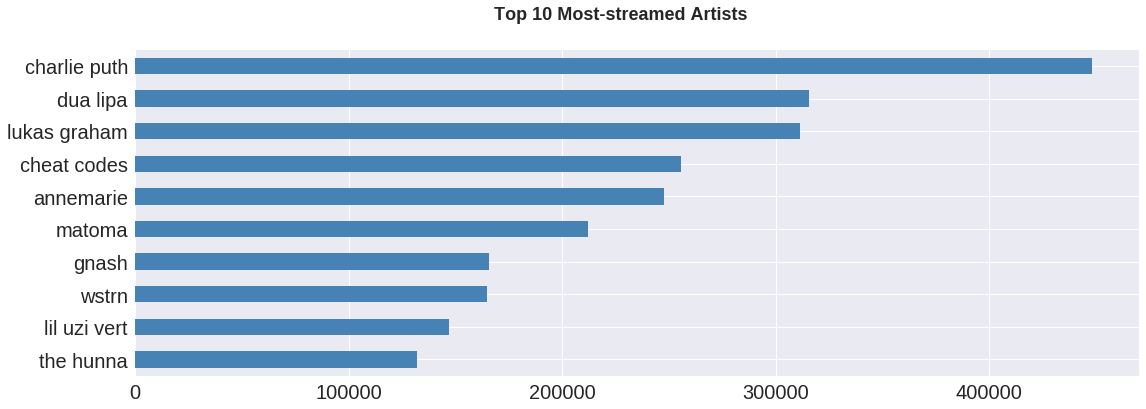

In [0]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Top 10 Most-streamed Artists', fontsize=18, fontweight='bold')
all_artists_2.artist_name.value_counts(dropna=False, ascending=True).tail(10).plot(kind='barh', color='steelblue', rot=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

This horizontal bar chart below shows the top 10 most-streamed playlists in the dataset. An interesting fact is that the top 4 playlists in the graph is not identical with the key playlists defined in the Business Problem section.

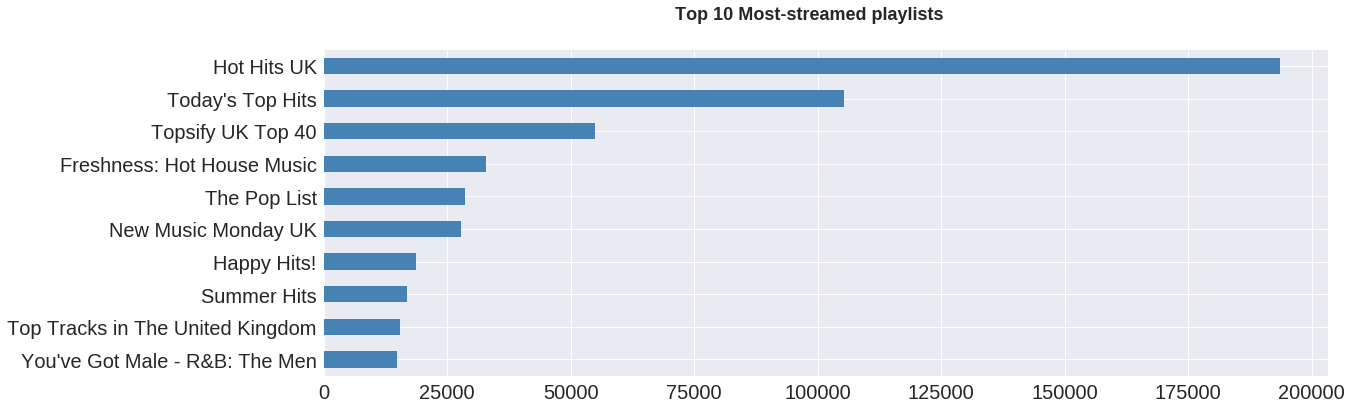

In [0]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Top 10 Most-streamed playlists', fontsize=18, fontweight='bold')
all_artists_2.playlist_name.value_counts(ascending=True).tail(10).plot(kind='barh', color='steelblue', rot=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [0]:
total_steam_time = all_artists_2.groupby(['artist_name'],as_index=False)['stream_length'].agg({'total_stream_time':'sum'})

In [0]:
#the code in this cell shows the top 10 longest-streamed artists in the dataset, this ranking is not consistent with the top 10 most-streamed artists bar chart. 
#The reason for this can be every artist produces songs with various length as well as other factors.
total_steam_time.sort_values(by="total_stream_time" , ascending=False).head(10)

,artist_name,total_stream_time
98,charlie puth,83200389.0
333,lukas graham,64529983.0
158,dua lipa,56221544.0
101,cheat codes,47190001.0
37,annemarie,45243135.0
360,matoma,44838664.0
199,gnash,35278062.0
619,wstrn,34932583.0
291,kyle,26088411.0
311,lil uzi vert,24348120.0


In [0]:
#top 5 most-streamed region. GB-SRY is an interesting case as the region is a county whereas other top 4 regions are major cities in the UK.
all_artists_2.region_code.value_counts().head(5)

GB-LND    495661
GB-BIR    105316
GB-MAN     78696
GB-SRY     76532
GB-GLG     72776
Name: region_code, dtype: int64

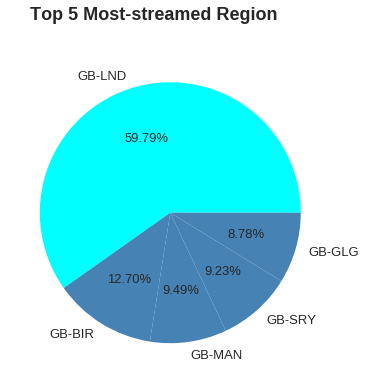

In [0]:
#over half of the streams in the dataset generated in London area.
fig = plt.figure()
fig.suptitle('Top 5 Most-streamed Region', fontsize=18, fontweight='bold')
all_artists_2.region_code.value_counts().head(5).plot(kind='pie',autopct = '%3.2f%%', fontsize=13, figsize=(18, 6), colors=[ 'aqua', 'steelblue', 'steelblue', 'steelblue', 'steelblue'])
plt.ylabel('', fontsize=18)
plt.show()

Examing the stream count by week day, one can conclude that people are more likely to stream music on Monday, Saturday, Friday and Wednesday.

In [0]:
all_artists_2.weekday_name.value_counts(dropna=False)

Monday       763953
Saturday     697951
Friday       659597
Wednesday    646564
Tuesday      356765
Thursday     354268
Sunday       326401
Name: weekday_name, dtype: int64

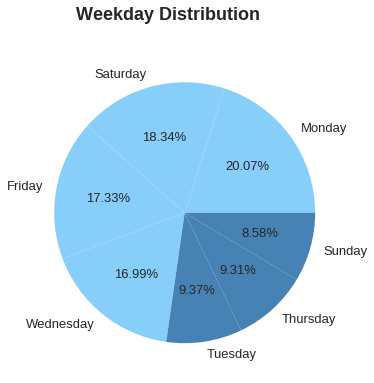

In [0]:
fig = plt.figure()
fig.suptitle('Weekday Distribution', fontsize=18, fontweight='bold')
all_artists_2.weekday_name.value_counts(dropna=False).plot(kind='pie',autopct = '%3.2f%%', fontsize=13, figsize=(18, 6), colors=['lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'steelblue', 'steelblue', 'steelblue'])
plt.ylabel('', fontsize=18)
plt.show()

In [0]:
#people also tend to stream music during afternoon and evening time, 2pm - 6pm.
all_artists_2.hour.value_counts(dropna=False).head(5)

16    275134
17    272160
15    256739
18    250817
14    231447
Name: hour, dtype: int64

Below shows that people like to stream music using mobile devices. In particularly, iphone is the most popular streaming device.

In [0]:
all_artists_2.stream_device.value_counts(dropna=False)

mobile     2569508
desktop     861630
tablet      374361
Name: stream_device, dtype: int64

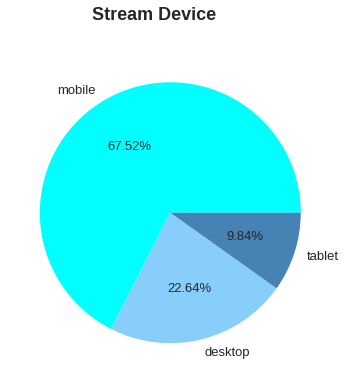

In [0]:
fig = plt.figure()
fig.suptitle('Stream Device', fontsize=18, fontweight='bold')
all_artists_2.stream_device.value_counts(dropna=False).plot(kind='pie',autopct = '%3.2f%%', fontsize=13, figsize=(18, 6), colors=[ 'aqua', 'lightskyblue', 'steelblue'])
plt.ylabel('', fontsize=18)
plt.show()

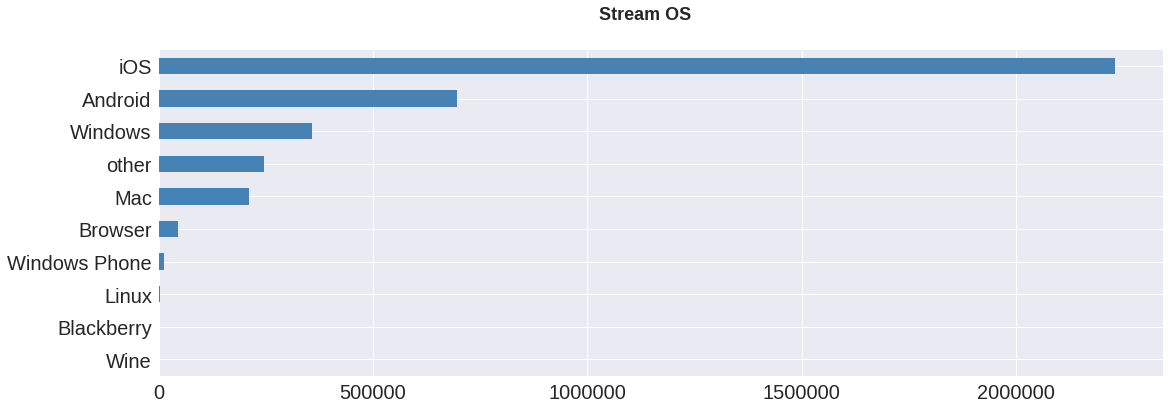

In [0]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Stream OS', fontsize=18, fontweight='bold')
all_artists_2.stream_os.value_counts(dropna=False, ascending=True).tail(10).plot(kind='barh', color='steelblue', rot=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# playlist_mapper_clean - Playlist Name Mapper

In [0]:
#check data structure
playlist_mapper_clean.shape

(149589, 2)

In [0]:
#check data type of each column
playlist_mapper_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149589 entries, 0 to 194559
Data columns (total 2 columns):
id      149589 non-null object
name    149584 non-null object
dtypes: object(2)
memory usage: 3.4+ MB


In [0]:
#count overall NaN of each column in the dataset, the result shows that there 5 missing values in the 'name' column.
playlist_mapper_clean.isna().sum()

id      0
name    5
dtype: int64

In [0]:
#check duplicated entries in the dataset, the result shows that no duplicated data in the dataset
playlist_mapper_clean.duplicated().value_counts(dropna=False)

False    149589
dtype: int64

In [0]:
playlist_mapper_clean.head(3)

,id,name
0,607qZnoGjqhpWjOaJWakmx,80er jaren
1,4xP3wJiHkHfyPcGBjsZcpf,Glee
2,1iHOfbhKGHImcrEJXhrUdg,Best of 1980s


-- --

## 3.	Data Preperation and Feature Engineering
<br>
From our business understanding, we know that our criteria for success is whether or not an artist has been on one of 4 key playlists.  The column ‘stream_source_uri’, contains data about the source of the stream – whether it was from an artist’s page, an album, a playlist etc. 

For streams coming from different playlists, only the Spotify URI code is provided. To make sense of this column and identify our key playlists, we can use the additional table provided that we cleaned above and named 'playlist_mapper'.

We can being by out data preperation by subsetting the 4 key playlists we are interested in and creating our dependent variable:

** Create Dependent Variable **

In [0]:
playlist_mapper_3 = playlist_mapper_clean.copy()

In [0]:
key_playlists = ['hot hits uk', 'massive dance hits', 'the indie list', 'new music friday']

In [0]:
#format the string in the 'name' column before selecting the corresponsing playlist ids for the key playlists
playlist_mapper_3['name'] = playlist_mapper_3.name.str.lower()
key_playlists_mapper = playlist_mapper_3[playlist_mapper_3.name.isin(key_playlists)]
key_playlists_mapper.shape

(16, 2)

In [0]:
#check for duplicated entries, no deplicated data is indicated.
key_playlists_mapper.duplicated("id").value_counts(dropna=False)

False    16
dtype: int64

In [0]:
key_playlists_mapper_id = list(key_playlists_mapper.id)

In [0]:
# Define Dependent Variable
all_artists_2['successful'] = 0 

In [0]:
#previously indicated, there are NaN values in the stream_source_uri columns, fill NaN with 'missing' before mapping dependent variables.
all_artists_2['stream_source_uri'][all_artists_2['stream_source_uri'].isnull()] = 'missing'

In [0]:
#for loop to label successful stream as '1'.
for key_playlists_id in key_playlists_mapper_id:
    all_artists_2['successful'][all_artists_2['stream_source_uri'].str.contains(key_playlists_id)] = 1

In [0]:
#after labeling, there are 202779 instances of successful streams and 3602720 unsuccessful streams or streams with missing URI.
all_artists_2['successful'].value_counts(dropna=False)

0    3602720
1     202779
Name: successful, dtype: int64

Reset all missing values in the 'stream_source_uri' column to NaN.

In [0]:
all_artists_2['stream_source_uri'][all_artists_2['stream_source_uri'] == 'missing'] = np.nan

In [0]:
all_artists_2.shape

(3805499, 46)

In [0]:
all_artists_2.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,log_time,DateTime,date,year,month,day,week,...,offline_timestamp,stream_length,stream_cached,stream_source,stream_device,stream_os,track_uri,track_artists,source,successful
0,0,9,"('small_artists_2016.csv', 9)",20160510T12:15:00,2016-05-10 12:15:00,2016-05-10,2016,5,10,19,...,NaN,277.0,NaN,album,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,0
1,1,19,"('small_artists_2016.csv', 19)",20160510T12:15:00,2016-05-10 12:15:00,2016-05-10,2016,5,10,19,...,NaN,53.0,NaN,album,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,0
2,2,29,"('small_artists_2016.csv', 29)",20160510T14:00:00,2016-05-10 14:00:00,2016-05-10,2016,5,10,19,...,NaN,326.0,NaN,collection,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,0


Now that we have created our dependent variable – whether an artist is successful or not, we can look at generating a set of features, based on the columns within our dataset, that we think might best explain the reasons for this success. 

**FEATURE ENGINEERING**

There are a large number of factors that could have an impact on the success of an artist, such as the influence of a playlist, or the popularity of an artist in a certain geographical region. 

To build a predictive model for this problem, we first need to turn these (largely qualitative) factors into measurable quantities. Characteristics like ‘influence’ and ‘popularity’ need to be quantified and standardized for all artists, to allow for a fair comparison. 

The accurateness of these numerical estimates will be the fundamental driver of success for any model we build. 
There are many approaches one might take to generate features. Based on the data columns available to us, a sensible approach is to divide our feature set into three groups:

1.	Artist Features
2.	Playlist Features
3.	User-base features


## Artist features

*	Stream count
*	Total Number of users
*	Passion Score 

The metric passion score is a metric suggested to us by Warner business analysts. 

It is defined as the number of stream divided by the total number of users. 

Warner analysts believe that repeated listens by a user is a far more indicative future success that simply **total number of listens or total unique users.** By including this in your model, we can evaluate whether this metric in fact might be of any significance.

In [0]:
#check NaN entries in the 'artist name' column
all_artists_2.artist_name.isna().sum()

0

In [0]:
#there are 639 unique artists in the dataset
len(all_artists_2['artist_name'].unique())

639

In [0]:
# create Stream count per artist
stream_count_per_artist = all_artists_2.groupby(['artist_name'],as_index=False)['artist_name'].agg({'stream_count_per_artist':'count'})
stream_count_per_artist.head(3)

,artist_name,stream_count_per_artist
0,17 memphis,12
1,2d,1
2,3js,5


In [0]:
#filter out unique customer id
artist_features_2 = all_artists_2[['artist_name', 'customer_id']]
artist_features_2.duplicated().value_counts(dropna=False)
artist_features_2 = artist_features_2.drop_duplicates()

In [0]:
#confirm no NaN in the 'customer id' column
artist_features_2.customer_id.isnull().sum()

0

In [0]:
# create Number of users per artist based on unique customer id
number_of_users_per_artist = artist_features_2.groupby(['artist_name'],as_index=False)['customer_id'].agg({'number_of_users_per_artist':'count'})
number_of_users_per_artist.head(3)

,artist_name,number_of_users_per_artist
0,17 memphis,12
1,2d,1
2,3js,4


In [0]:
artist_features = pd.merge(stream_count_per_artist, number_of_users_per_artist)

In [0]:
# calculate Passion Score
artist_features['passion_score'] = artist_features.stream_count_per_artist / artist_features.number_of_users_per_artist
artist_features.head(3)

,artist_name,stream_count_per_artist,number_of_users_per_artist,passion_score
0,17 memphis,12,12,1.00
1,2d,1,1,1.00
2,3js,5,4,1.25


In [0]:
#check NaN values in newly created dataset 'artist_features', the result confirms that no NaN exists.
artist_features.isnull().sum()

artist_name                   0
stream_count_per_artist       0
number_of_users_per_artist    0
passion_score                 0
dtype: int64

## Playlist Features

Understanding an artist’s growth as a function of his/her movement across different playlists is potentially key to understanding how to identify and breakout new artists on Spotify. 

In turn, this could help us identify the most influential playlists and the reasons for their influence.

One way to model the effect of playlists on an artist’s performance has been to include them as categorical features in our model, to note if there are any particular playlists or combinations of playlists that are responsible for propelling an artist to future success:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*
**
Success (1) = Artist Features on Key Playlist
Failure (0) = Artist Not Featured on Key Playlist
**

Where,

**
⇒Artist Feature N = Prior Playlist 1 + Prior Playlist 2 +…Prior Playlist N
**


Given that we have over 19,000 playlists in our dataset or 600 artists, using the playlists each artist has featured on, as categorical variables would lead to too many features and a very large, sparse matrix. 

Instead, we need to think of ways to summarize the impact of these playlists. One way to do this would be to **consider the top 20 playlists each artist has featured on.** 

**Even better would be to come up with one metric that captures the net effect of all top 20 prior playlists, for each artist, rather including using all 20 playlists for each artists as binary variables.** The intuition here is that if this metric as a whole has an influence on the performance of an artist, it would suggest that rather than the individual playlists themselves, it is a combination of their generalized features that affects the future performance of an artist. 

Accordingly, different combinations of playlists could equate to having the same impact on an artist, thereby allowing us to identify undervalued playlists.

**Some of the features such a metric could use is the number of unique users or ‘reach’, number of stream counts, and the passion score of each playlist**

* Prior Playlist Stream Counts
* Prior Playlist Unique Users (Reach)
* Prior Playlist Passion Score

There are several other such features that you could generate to better capture the general characteristics of playlists, **such as the average lift in stream counts and users they generate for artists that have featured on them.**

The code to calculate these metrics is provided below:

In [0]:
# create playlist_avg_stream_counts

Create a dataframe 's11' with one column listing all unique artist names and one empty column named 'playlist_avg_stream_counts'

In [0]:
c1 = list(all_artists_2['artist_name'].unique())
s11 = pd.DataFrame(c1, columns=['artist_name'])
s11['playlist_avg_stream_counts'] = ""

The for loop below aims to calculate the playlist average stream counts for each unique artists.

The loop does 3 things:
1. for each artist, find out the corresponding top playlists (maximum top 20) and total stream count of each top playlist 
2. calculate average stream count (sum of stream count in top playlists / the number of top playlist)
3. assign the value to dataframe 's11' under the column of 'playlist_avg_stream_counts' with the corresponding 'artist_name'

In [0]:
for c in c1:
    s1 = all_artists_2[['artist_name', 'playlist_name']][all_artists_2['artist_name'] == c].playlist_name.value_counts().head(20)
    s2 = s1.sum() / s1.count()
    s11['playlist_avg_stream_counts'][s11['artist_name'] == c] = s2

In [0]:
#view playlist_avg_stream_counts, NaN represents missing information in the 'playlist_name' col.
s11.head(3) 

,artist_name,playlist_avg_stream_counts
0,sturgill simpson,90.25
1,delafe,NaN
2,willy william,9.4


In [0]:
# create playlist_avg_number_of_users

Initiate a dataframe 's12' with columns 'artist_name' and 'playlist_avg_number_of_users'

In [0]:
a1 = all_artists_2[['artist_name', 'playlist_name', 'customer_id']]
s12 = pd.DataFrame(c1, columns=['artist_name'])
s12['playlist_avg_number_of_users'] = ""

The for loop below aims to calculate the 'playlist_avg_number_of_users' for each unique artist.

The loop does 4 things:
1. for each artist, filter out top playlists (max 20)
2. among the top playlists of each artist, calculate the count of unique customer id in each top playlist
3. for each artist, calculate playlist_avg_number_of_counts (sum of unique customer id in all top playlist / the number of top playlist)
4. assign the playlist_avg_number_of_counts of each artist into dataframe s12

In [0]:
for c in c1:
    v1 = all_artists_2[['artist_name', 'playlist_name']][all_artists_2['artist_name'] == c].playlist_name.value_counts().head(20)
    v3 = list(v1.index)
    v2 = all_artists_2[['artist_name', 'playlist_name', 'customer_id']][all_artists_2['artist_name'] == c]
    v4 = v2[v2.playlist_name.isin(v3)]
    v5 = v4.groupby(['artist_name','playlist_name'],as_index=False)['customer_id'].agg({'customer_id_unicount':pd.Series.nunique})
    v6 = v5.customer_id_unicount.sum() / v5.playlist_name.count()
    s12['playlist_avg_number_of_users'][s12['artist_name'] == c] = v6

In [0]:
s12.head(3)

,artist_name,playlist_avg_number_of_users
0,sturgill simpson,86.6
1,delafe,NaN
2,willy william,9.1


In [0]:
# combine playlist_avg_stream_counts and playlist_avg_number_of_users
playlist_features = pd.merge(s11, s12)

In [0]:
#calculate playlist_avg_passion_score
playlist_features['playlist_avg_passion_score'] = playlist_features.playlist_avg_stream_counts / playlist_features.playlist_avg_number_of_users

In [0]:
playlist_features.head(3)

,artist_name,playlist_avg_stream_counts,playlist_avg_number_of_users,playlist_avg_passion_score
0,sturgill simpson,90.25,86.6,1.04215
1,delafe,NaN,NaN,NaN
2,willy william,9.4,9.1,1.03297


In [0]:
playlist_features.shape

(639, 4)

## User-base features

We can use the age and gender columns to create an audience profile per artist.
*	Gender Percentage Breakdown
*	Age vector quantization 


In [0]:
# create gender percentage breakdown

In [0]:
# check out the number of NaN in the column
all_artists_2.gender.value_counts(dropna=False)

female    1955719
male      1809358
NaN         40422
Name: gender, dtype: int64

Create a dataframe 'gender_2' to record total gender count and total female count of each artist.

In [0]:
gender_count_per_artist = all_artists_2.groupby(['artist_name'],as_index=False)['gender'].agg({'gender_total_count':'count'})

In [0]:
f_count_per_artist = all_artists_2[['artist_name', 'gender']][all_artists_2['gender'] == 'female'].groupby(['artist_name'],as_index=False)['gender'].agg({'f':'count'})

In [0]:
gender_2 = pd.merge(gender_count_per_artist,f_count_per_artist, on=['artist_name'], how='outer')

In [0]:
#calculate female percentage
gender_2['f_percentage'] = gender_2.f / gender_2.gender_total_count

In [0]:
gender_feature = gender_2[['artist_name', 'f_percentage']]
gender_feature.head(3)

,artist_name,f_percentage
0,17 memphis,0.666667
1,2d,NaN
2,3js,0.200000


In [0]:
#there are 71 missing percentage values in the dataset
gender_feature['f_percentage'].isnull().sum()

71

In [0]:
# create age categories using birth year

In [0]:
#split birth year into 6 year groups
bins = [0, 1866, 1897, 1928, 1959, 1990, 2021]
group_names = ['before_1866', '1867-1897', '1898-1928', '1929-1959','1960-1990', '1991-2021']

In [0]:
#assign year group label
all_artists_2['year_group'] = pd.cut(all_artists_2['birth_year'], bins, labels=group_names)

In [0]:
all_artists_2[['artist_name', 'birth_year', 'year_group']].head(3)

,artist_name,birth_year,year_group
0,sturgill simpson,1968.0,1960-1990
1,sturgill simpson,1968.0,1960-1990
2,sturgill simpson,1995.0,1991-2021


Create a dataframe 'age_feature_1'  to show the count of each year group as well as the total count for each artist.

In [0]:
year_group_count = all_artists_2.groupby(['artist_name'],as_index=False)['year_group'].agg({'total':'count'})

In [0]:
before_1866 = all_artists_2[['artist_name', 'year_group']][all_artists_2['year_group'] == 'before_1866'].groupby(['artist_name'],as_index=False)['year_group'].agg({'before_1866':'count'})
y1867_1897 = all_artists_2[['artist_name', 'year_group']][all_artists_2['year_group'] == '1867-1897'].groupby(['artist_name'],as_index=False)['year_group'].agg({'1867-1897':'count'})
y1898_1928 = all_artists_2[['artist_name', 'year_group']][all_artists_2['year_group'] == '1898-1928'].groupby(['artist_name'],as_index=False)['year_group'].agg({'1898-1928':'count'})
y1929_1959 = all_artists_2[['artist_name', 'year_group']][all_artists_2['year_group'] == '1929-1959'].groupby(['artist_name'],as_index=False)['year_group'].agg({'1929-1959':'count'})
y1960_1990 = all_artists_2[['artist_name', 'year_group']][all_artists_2['year_group'] == '1960-1990'].groupby(['artist_name'],as_index=False)['year_group'].agg({'1960-1990':'count'})
y1991_2021 = all_artists_2[['artist_name', 'year_group']][all_artists_2['year_group'] == '1991-2021'].groupby(['artist_name'],as_index=False)['year_group'].agg({'1991-2021':'count'})

In [0]:
age_1 = pd.merge(year_group_count,before_1866, on=['artist_name'], how='outer')
age_2 = pd.merge(age_1,y1867_1897, on=['artist_name'], how='outer')
age_3 = pd.merge(age_2,y1898_1928, on=['artist_name'], how='outer')
age_4 = pd.merge(age_3,y1929_1959, on=['artist_name'], how='outer')
age_5 = pd.merge(age_4,y1960_1990, on=['artist_name'], how='outer')

In [0]:
age_feature_1 = pd.merge(age_5,y1991_2021, on=['artist_name'], how='outer')
age_feature_1.head(3)

,artist_name,total,before_1866,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021
0,17 memphis,12,NaN,NaN,NaN,NaN,3.0,9.0
1,2d,1,NaN,NaN,NaN,NaN,NaN,1.0
2,3js,5,NaN,NaN,NaN,NaN,4.0,1.0


In [0]:
age_feature_2 = age_feature_1.copy()

In [0]:
#calculate age distribution per artist
for names in group_names:
    age_feature_2[names] = age_feature_1[names] / age_feature_1.total

In [0]:
age_feature_2.head(3)

,artist_name,total,before_1866,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021
0,17 memphis,12,NaN,NaN,NaN,NaN,0.25,0.75
1,2d,1,NaN,NaN,NaN,NaN,NaN,1.00
2,3js,5,NaN,NaN,NaN,NaN,0.80,0.20


In [0]:
# before 1866 contains no meaningful values
age_feature_2['before_1866'].isnull().value_counts(dropna=False)

True    639
Name: before_1866, dtype: int64

In [0]:
# drop uncessary columns
age_feature = age_feature_2.drop(columns=['total','before_1866'])
age_feature.head(3)

,artist_name,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021
0,17 memphis,NaN,NaN,NaN,0.25,0.75
1,2d,NaN,NaN,NaN,NaN,1.00
2,3js,NaN,NaN,NaN,0.80,0.20


In [0]:
# combine gender_feature and age_feature
user_base_features = pd.merge(gender_feature, age_feature, on=['artist_name'], how='outer')

In [0]:
user_base_features.head(3)

,artist_name,f_percentage,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021
0,17 memphis,0.666667,NaN,NaN,NaN,0.25,0.75
1,2d,NaN,NaN,NaN,NaN,NaN,1.00
2,3js,0.200000,NaN,NaN,NaN,0.80,0.20


**Principle Component Analysis**

The data also contains a partial region code of the listener. We might want to **consider including the regional breakdown of streams per artist as a feature of our model, to know if streams for certain regions are particularly influential on the future performance of an artist.**

However, we have over 400 unique regions and like playlists, including them all would lead to too many features and a large sparse matrix. One way in which to extract relevant ‘generalized’ features of each region would be to incorporate census and demographic data, from publicly available datasets. 

This is however beyond the scope of this courswork. Instead, a better way to summarize the impact of regional variation in streams is to use dimensionality reduction techniques. Here we will use Principle Component Analysis (PCA) to capture the regional variation in stream count.

PCA captures the majority of variation in the original feature set and represents it as a set of new orthogonal variables. Each ‘component’ of PCA is a linear combination of every feature, i.e. playlist in the dataset. Use **`scikit-learn`**’s PCA module (Pedregosa, et al., 2011) for generating PCA components.

For a comprehensive understanding of how sklearn's PCA module works, please refer to the sklearn documentation. We will **using 10 components of PCA in our model.**



In [0]:
pca_1 = all_artists_2.groupby(['artist_name', 'region_code'],as_index=False)['region_code'].agg({'region_code_count':'count'})
pca_1.head(3)

,artist_name,region_code,region_code_count
0,17 memphis,GB-BFS,1
1,17 memphis,GB-BIR,1
2,17 memphis,GB-BRY,1


In [0]:
#create dataframe showing each region count per artist
pca_2 = pca_1.pivot_table(index='artist_name', columns='region_code', values='region_code_count')
pca_2.head(3)

region_code,0,500,501,502,504,505,506,508,510,511,...,SE-G,SE-H,SE-M,SE-N,SE-O,SE-S,SE-T,SE-W,SE-Y,SE-Z
artist_name,,,,,,,,,,,,,,,,,,,,,
17 memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
pca_3 = pca_2.reset_index()
pca_3.head(3)

region_code,artist_name,0,500,501,502,504,505,506,508,510,...,SE-G,SE-H,SE-M,SE-N,SE-O,SE-S,SE-T,SE-W,SE-Y,SE-Z
0,17 memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3js,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
pca_4 = pca_3.drop(columns=['artist_name'])
pca_4.head(3)

region_code,0,500,501,502,504,505,506,508,510,511,...,SE-G,SE-H,SE-M,SE-N,SE-O,SE-S,SE-T,SE-W,SE-Y,SE-Z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#it is necessary to ensure all data entries are numerical before processing to PCA
from sklearn.preprocessing import Imputer

In [0]:
#use the median value of each column to fill NaN in the corresponding column
imp_pca = Imputer(missing_values='NaN', strategy='median', axis=0) 
pca_5 = imp_pca.fit_transform(pca_4)
pca_6 = pd.DataFrame(data = pca_5, columns = [pca_4.columns])
pca_6.head(3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


region_code,0,500,501,502,504,505,506,508,510,511,...,SE-G,SE-H,SE-M,SE-N,SE-O,SE-S,SE-T,SE-W,SE-Y,SE-Z
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


PCA is effected by scale thus a feature set must be scaled before applying PCA. Otherwise, principal components will be biased towards features with high variance, leading to false results.

In [0]:
#Standardize pca_6 to ensure region feature is standarized onto unit scale (mean = 0 and variance = 1)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
pca_std = StandardScaler().fit_transform(pca_6)

In [0]:
#perform PCA on region feature

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(pca_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [('pca_' + str(_ + 1))for _ in range(10)])

In [0]:
print('Explanined Variance:', pca.explained_variance_)
print('Accumulated Explained Variance Ratio:', pca.explained_variance_ratio_.cumsum())

Explanined Variance: [246.48408385  17.30715361  14.50147024  12.17697056   9.79800544
   8.87300593   6.82237734   6.55941599   5.28313116   4.92542832]
Accumulated Explained Variance Ratio: [0.65976298 0.70608898 0.744905   0.77749905 0.80372534 0.82747568
 0.84573711 0.86329467 0.87743601 0.89061988]


In [0]:
#PCA table
principalDf['artist_name'] = pca_3['artist_name']
pca_regions_output = principalDf[['artist_name','pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10']]
pca_regions_output.head(3)

,artist_name,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,17 memphis,-2.518021,0.085165,0.072828,-0.070431,-0.184694,0.000326,-0.095271,-0.006179,-0.078020,0.047463
1,2d,-2.500352,0.084191,0.067337,-0.073784,-0.182045,-0.002296,-0.093465,-0.003544,-0.077910,0.045927
2,3js,-2.504888,0.085309,0.068567,-0.072285,-0.181623,-0.002964,-0.094629,-0.003790,-0.078422,0.045794


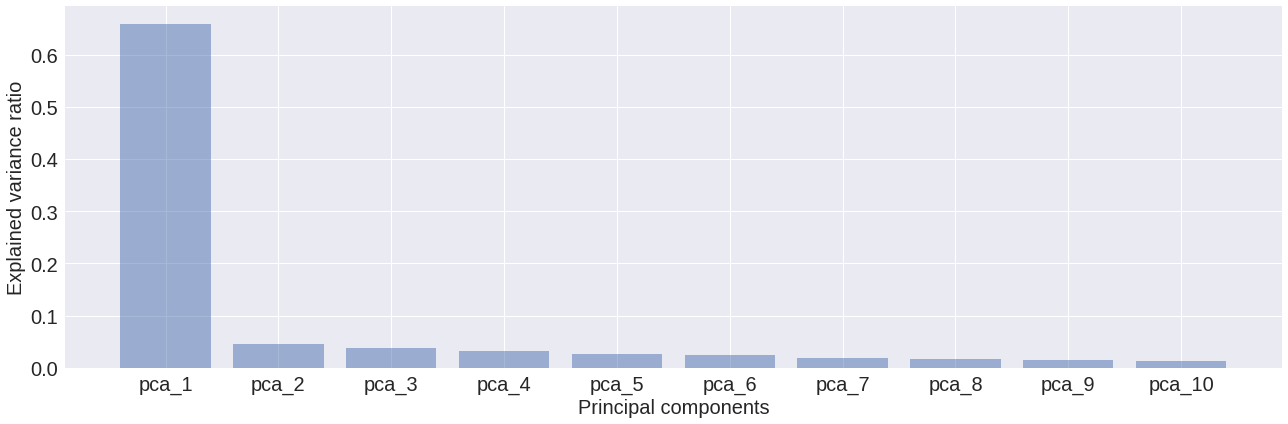

In [0]:
#Plotting the Explained Variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(18, 6))
plt.bar(range(1, 11), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio', fontsize=20)
plt.xlabel('Principal components', fontsize=20)
plt.xticks(range(1, 11), ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

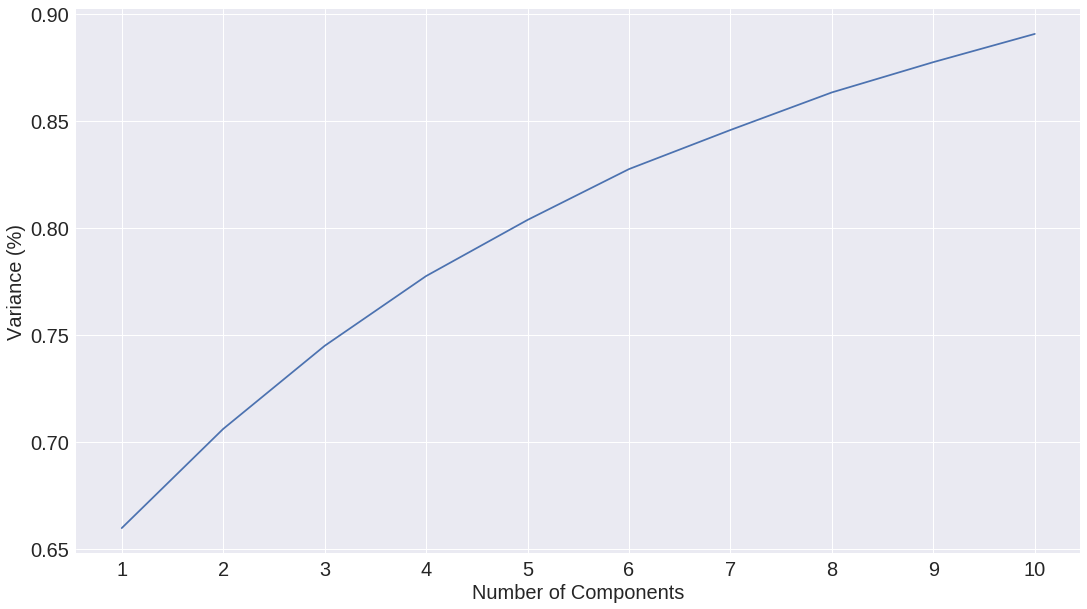

In [0]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(18, 10))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components', fontsize=20)
plt.xticks(range(0, 10), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.ylabel('Variance (%)', fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Based on the results above, 10 principal components together can account for 89% of the information in the region code feature. Hence, all 10 principal components are selected as features to include in the model.

**Data transformation**

The final step is to decide whether or not to normalize/transform any of the features. 

We should **normalize data if we are more interested in the relative rather than absolute differences between variables. Given that all the numerical features in our dataset (centrality, lift, influence, gender breakdown, age breakdown) were meaningful, i.e. distances did make a difference;**

Begin by examing all created features:

In [0]:
pca_regions_output.head(3)

,artist_name,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,17 memphis,-2.518021,0.085165,0.072828,-0.070431,-0.184694,0.000326,-0.095271,-0.006179,-0.078020,0.047463
1,2d,-2.500352,0.084191,0.067337,-0.073784,-0.182045,-0.002296,-0.093465,-0.003544,-0.077910,0.045927
2,3js,-2.504888,0.085309,0.068567,-0.072285,-0.181623,-0.002964,-0.094629,-0.003790,-0.078422,0.045794


In [0]:
user_base_features.head(3)

,artist_name,f_percentage,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021
0,17 memphis,0.666667,NaN,NaN,NaN,0.25,0.75
1,2d,NaN,NaN,NaN,NaN,NaN,1.00
2,3js,0.200000,NaN,NaN,NaN,0.80,0.20


In [0]:
artist_features.head(3)

,artist_name,stream_count_per_artist,number_of_users_per_artist,passion_score
0,17 memphis,12,12,1.00
1,2d,1,1,1.00
2,3js,5,4,1.25


In [0]:
playlist_features.head(3)

,artist_name,playlist_avg_stream_counts,playlist_avg_number_of_users,playlist_avg_passion_score
0,sturgill simpson,90.25,86.6,1.04215
1,delafe,NaN,NaN,NaN
2,willy william,9.4,9.1,1.03297


Since all the numerical features are meaningful, and distances does make a difference, it is not useful to normalize the features. Next, combine all features into a single dataframe.

In [0]:
all_features_combine_1 = pd.merge(artist_features,playlist_features, on=['artist_name'], how='outer')

In [0]:
all_features_combine_2 = pd.merge(all_features_combine_1,user_base_features, on=['artist_name'], how='outer')

In [0]:
all_features_combine_3 = pd.merge(all_features_combine_2,pca_regions_output, on=['artist_name'], how='outer')

In [0]:
all_features_combine_3.head(3)

,artist_name,stream_count_per_artist,number_of_users_per_artist,passion_score,playlist_avg_stream_counts,playlist_avg_number_of_users,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,...,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,17 memphis,12,12,1.00,6,6,1,0.666667,NaN,NaN,...,-2.518021,0.085165,0.072828,-0.070431,-0.184694,0.000326,-0.095271,-0.006179,-0.078020,0.047463
1,2d,1,1,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.500352,0.084191,0.067337,-0.073784,-0.182045,-0.002296,-0.093465,-0.003544,-0.077910,0.045927
2,3js,5,4,1.25,NaN,NaN,NaN,0.200000,NaN,NaN,...,-2.504888,0.085309,0.068567,-0.072285,-0.181623,-0.002964,-0.094629,-0.003790,-0.078422,0.045794


In [0]:
#drop unnecessary columns
all_features_combine_4 = all_features_combine_3.drop(columns=['artist_name', 'stream_count_per_artist', 'number_of_users_per_artist', 'playlist_avg_stream_counts','playlist_avg_number_of_users'])
all_features_combine_4.head(3)

,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,1.00,1,0.666667,NaN,NaN,NaN,0.25,0.75,-2.518021,0.085165,0.072828,-0.070431,-0.184694,0.000326,-0.095271,-0.006179,-0.078020,0.047463
1,1.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,-2.500352,0.084191,0.067337,-0.073784,-0.182045,-0.002296,-0.093465,-0.003544,-0.077910,0.045927
2,1.25,NaN,0.200000,NaN,NaN,NaN,0.80,0.20,-2.504888,0.085309,0.068567,-0.072285,-0.181623,-0.002964,-0.094629,-0.003790,-0.078422,0.045794


**Preprocessing**

Before we can run any models on our dataset, we must make sure it is prepared and cleaned to avoid errors in results. This stage is generally refered to as preprocessing.

To begin with, we need to deal with missing data in the dataframe - the ML algorithm will not be able to process NaN or missing values. 

For this study, we will be imputing missing numerical values, and filling any one which we were not able to imput, with 0.

Since there are NaN values in the dataset, Imputer is applied to handle missing values by filling them with the median of each column.

In [0]:
from sklearn.preprocessing import Imputer

In [0]:
af_imp = Imputer(missing_values='NaN', strategy='median', axis=0) 
af_imp_1 = af_imp.fit_transform(all_features_combine_4)
af_imp_2 = pd.DataFrame(data = af_imp_1, columns=['passion_score','playlist_avg_passion_score','f_percentage','1867-1897','1898-1928','1929-1959','1960-1990','1991-2021','pca_1', 'pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
af_imp_2.head(3)

,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,1.00,1.0,0.666667,0.000003,0.003895,0.014706,0.25000,0.75,-2.518021,0.085165,0.072828,-0.070431,-0.184694,0.000326,-0.095271,-0.006179,-0.078020,0.047463
1,1.00,1.0,0.460122,0.000003,0.003895,0.014706,0.47541,1.00,-2.500352,0.084191,0.067337,-0.073784,-0.182045,-0.002296,-0.093465,-0.003544,-0.077910,0.045927
2,1.25,1.0,0.200000,0.000003,0.003895,0.014706,0.80000,0.20,-2.504888,0.085309,0.068567,-0.072285,-0.181623,-0.002964,-0.094629,-0.003790,-0.078422,0.045794


In [0]:
#include artist name into af_imp_2
all_features_x = af_imp_2.copy()

In [0]:
all_features_x['artist_name'] = all_features_combine_3['artist_name']

In [0]:
all_features_x.head(3)

,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,artist_name
0,1.00,1.0,0.666667,0.000003,0.003895,0.014706,0.25000,0.75,-2.518021,0.085165,0.072828,-0.070431,-0.184694,0.000326,-0.095271,-0.006179,-0.078020,0.047463,17 memphis
1,1.00,1.0,0.460122,0.000003,0.003895,0.014706,0.47541,1.00,-2.500352,0.084191,0.067337,-0.073784,-0.182045,-0.002296,-0.093465,-0.003544,-0.077910,0.045927,2d
2,1.25,1.0,0.200000,0.000003,0.003895,0.014706,0.80000,0.20,-2.504888,0.085309,0.068567,-0.072285,-0.181623,-0.002964,-0.094629,-0.003790,-0.078422,0.045794,3js


In [0]:
#update the primary spotify dataset with created features
x_all = pd.merge(on=['artist_name'], left=all_artists_2, right=all_features_x, how = 'left')

In [0]:
x_all.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,log_time,DateTime,date,year,month,day,week,...,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,0,9,"('small_artists_2016.csv', 9)",20160510T12:15:00,2016-05-10 12:15:00,2016-05-10,2016,5,10,19,...,-1.728847,0.036679,-0.292602,-0.306397,0.164552,-0.269843,-0.429855,-0.053005,0.328698,0.220084
1,1,19,"('small_artists_2016.csv', 19)",20160510T12:15:00,2016-05-10 12:15:00,2016-05-10,2016,5,10,19,...,-1.728847,0.036679,-0.292602,-0.306397,0.164552,-0.269843,-0.429855,-0.053005,0.328698,0.220084
2,2,29,"('small_artists_2016.csv', 29)",20160510T14:00:00,2016-05-10 14:00:00,2016-05-10,2016,5,10,19,...,-1.728847,0.036679,-0.292602,-0.306397,0.164552,-0.269843,-0.429855,-0.053005,0.328698,0.220084


In [0]:
#Since there are 2761628 entries with missing URI, the definition of successful cannot be made for that particular stream. Drop all entries with missing URI.
x_all.stream_source_uri.isnull().sum()

2761628

In [0]:
xxx = x_all.dropna(axis = 0, subset = ['stream_source_uri'] )

In [0]:
#create the final feature dataframe by unnecessary columns
final_df = xxx.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'log_time', 'DateTime',
       'date', 'year', 'month', 'day', 'week', 'weekday', 'weekday_name',
       'hour', 'minute', 'track_name', 'track_id', 'album_name',
       'isrc', 'customer_id', 'birth_year', 'gender', 'postal_code',
       'region_code', 'country_code', 'stream_source_uri', 'mobile',
       'playlist_id', 'playlist_name', 'upc', 'access', 'filename',
       'referral_code', 'partner_name', 'financial_product',
       'user_product_type', 'offline_timestamp', 'stream_length',
       'stream_cached', 'stream_source', 'stream_device', 'stream_os',
       'track_uri', 'track_artists', 'source','year_group'])

In [0]:
final_df = final_df.drop(columns=['artist_name'])

In [0]:
final_df.head(3)

,successful,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1960-1990,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
64,0,1.061425,1.009804,0.407494,0.000003,0.002326,0.013953,0.455814,0.527907,-2.703981,0.094123,0.082067,-0.081615,-0.2217,0.012495,-0.097794,-0.006167,-0.0798,0.058691
65,0,1.061425,1.009804,0.407494,0.000003,0.002326,0.013953,0.455814,0.527907,-2.703981,0.094123,0.082067,-0.081615,-0.2217,0.012495,-0.097794,-0.006167,-0.0798,0.058691
66,0,1.061425,1.009804,0.407494,0.000003,0.002326,0.013953,0.455814,0.527907,-2.703981,0.094123,0.082067,-0.081615,-0.2217,0.012495,-0.097794,-0.006167,-0.0798,0.058691


In [0]:
final_df.isnull().sum()

successful                    0
passion_score                 0
playlist_avg_passion_score    0
f_percentage                  0
1867-1897                     0
1898-1928                     0
1929-1959                     0
1960-1990                     0
1991-2021                     0
pca_1                         0
pca_2                         0
pca_3                         0
pca_4                         0
pca_5                         0
pca_6                         0
pca_7                         0
pca_8                         0
pca_9                         0
pca_10                        0
dtype: int64

In [0]:
final_df.shape

(1043871, 19)

In [0]:
final_df.successful.value_counts(dropna=False)

0    841092
1    202779
Name: successful, dtype: int64

Hence, the final dataset contains 1043871 observations with 19 features. There are 841092 unsuccessful and 202779 successful labels. No missing value is in the dataset.

Next, we need to make sure that none of the variables going into the model are collinear, and if so, we need to remove those variables that are highly correlated.

Check for multicollinearity by calculating variance inflation factor (VIF) for each feature. A variable with VIF higher than 5 is treated as collinear variable hence is removed.

In [0]:
#a function to calculate the VIF values
import statsmodels.formula.api as sm
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [0]:
#Calculate VIF values for all features
vif_cal(input_data=final_df, dependent_col="successful")

passion_score  VIF =  1.97
playlist_avg_passion_score  VIF =  2.42
f_percentage  VIF =  1.73
1867-1897  VIF =  1.03
1898-1928  VIF =  1.41
1929-1959  VIF =  6.2
1960-1990  VIF =  514.54
1991-2021  VIF =  574.85
pca_1  VIF =  2.89
pca_2  VIF =  1.22
pca_3  VIF =  1.39
pca_4  VIF =  2.23
pca_5  VIF =  3.08
pca_6  VIF =  1.81
pca_7  VIF =  1.51
pca_8  VIF =  1.4
pca_9  VIF =  1.26
pca_10  VIF =  1.33


Based on VIF scores, feature 1960-1990 and feature 1991-2021 are highly correlated. Thus, it is necessary to remove one of the features. The correlation matrix below also confirms the colinearity between feature 1960-1990 and feature 1991-2021.

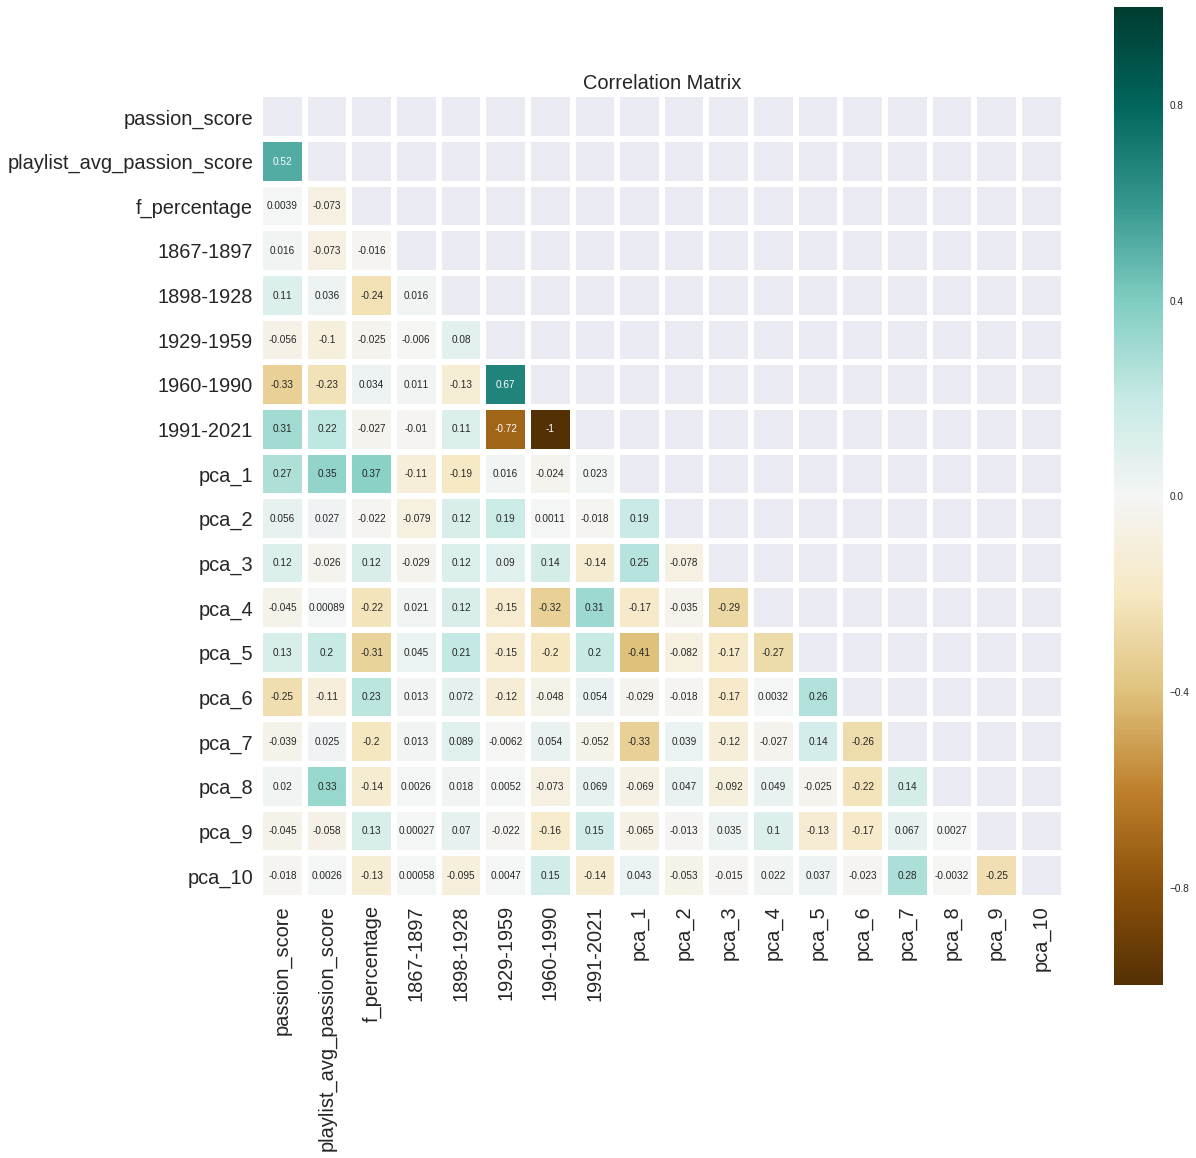

In [0]:
#correlation matrix
corr=final_df.drop(columns=['successful']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#plot correlation matrix
plt.figure(figsize=(18,18))
sns.heatmap(corr, mask=mask, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidth=5, square = 1, cmap = 'BrBG' , annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [0]:
#drop feature 1960-1990 and test VIF again
final_DF = final_df.drop(columns=['1960-1990'])

In [0]:
# all VIF scores are below 5, keep all 17 features
vif_cal(input_data=final_DF, dependent_col="successful")

passion_score  VIF =  1.97
playlist_avg_passion_score  VIF =  2.42
f_percentage  VIF =  1.73
1867-1897  VIF =  1.03
1898-1928  VIF =  1.34
1929-1959  VIF =  2.67
1991-2021  VIF =  3.63
pca_1  VIF =  2.89
pca_2  VIF =  1.22
pca_3  VIF =  1.39
pca_4  VIF =  2.23
pca_5  VIF =  3.08
pca_6  VIF =  1.81
pca_7  VIF =  1.51
pca_8  VIF =  1.4
pca_9  VIF =  1.26
pca_10  VIF =  1.33


From above, the VIF scores for all 17 features are below 5. No major multicollinearity exists. All these features can be included in the model.

In [0]:
final_DF.head(3)

,successful,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
64,0,1.061425,1.009804,0.407494,0.000003,0.002326,0.013953,0.527907,-2.703981,0.094123,0.082067,-0.081615,-0.2217,0.012495,-0.097794,-0.006167,-0.0798,0.058691
65,0,1.061425,1.009804,0.407494,0.000003,0.002326,0.013953,0.527907,-2.703981,0.094123,0.082067,-0.081615,-0.2217,0.012495,-0.097794,-0.006167,-0.0798,0.058691
66,0,1.061425,1.009804,0.407494,0.000003,0.002326,0.013953,0.527907,-2.703981,0.094123,0.082067,-0.081615,-0.2217,0.012495,-0.097794,-0.006167,-0.0798,0.058691


In [0]:
final_DF.shape

(1043871, 18)

Finally, we want to take a look out the class balance in our dependent variable.

Given the natural bias in our data, i.e. there are more cases of failure than of success in the training and test sets; there is a strong bias toward predicting ‘failure’. Based on our complete (unbalanced classes) training sample, if the model only predicted ‘failure’, we would achieve an accuracy of 88.8%. 

To give us a more even class balance, without losing too much data, we will sample data from the bigger class to achive a class balance of 50-50. 

Class 0: 841092
Class 1: 202779
Class Proportion: 4.0 : 1


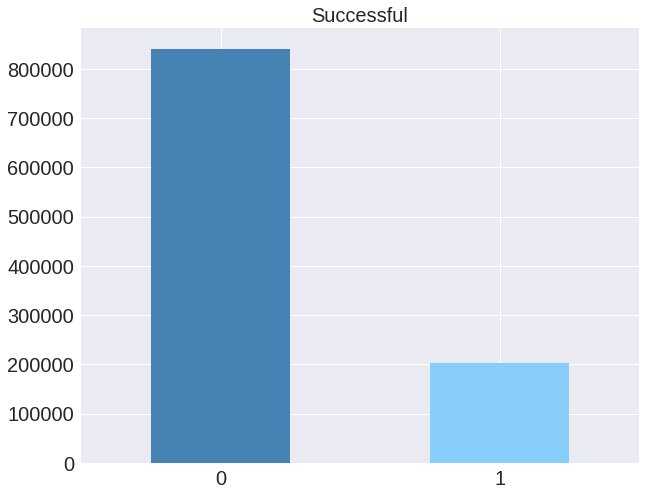

In [0]:
#exam existing class balance in the dataset final_DF
target_count = final_DF.successful.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class Proportion:', round(target_count[0] / target_count[1]), ': 1')

plt.figure(figsize=(10,8))
target_count.plot(kind='bar', title='Successful', colors=['steelblue', 'lightskyblue'], rot=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Successful', fontsize=20)
plt.show()

In [0]:
# Class count
count_class_0, count_class_1 = final_DF.successful.value_counts()

# Divide by class
df_class_0 = final_DF[final_DF['successful'] == 0]
df_class_1 = final_DF[final_DF['successful'] == 1]

Class 0: 202779
Class 1: 202779
Class Proportion: 1.0 : 1


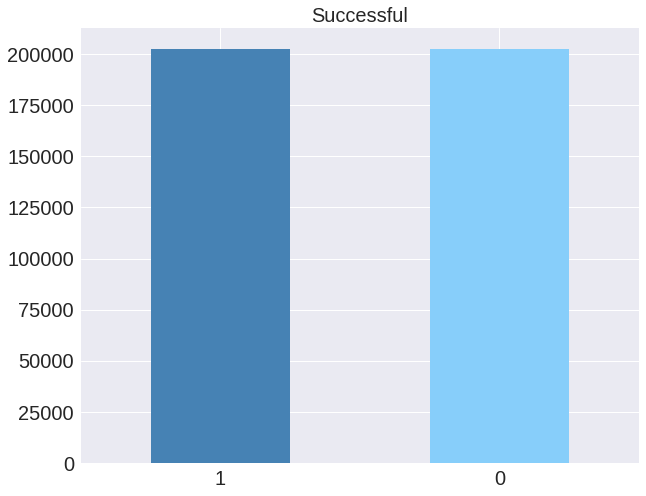

In [0]:
#undersampling to achieve 50-50 class balance
df_class_0_under = df_class_0.sample(count_class_1, random_state=42)
final_DF_balanced = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Class 0:', final_DF_balanced.successful.value_counts()[0])
print('Class 1:', final_DF_balanced.successful.value_counts()[1])
print('Class Proportion:', round(final_DF_balanced.successful.value_counts()[0] / final_DF_balanced.successful.value_counts()[1]), ': 1')

plt.figure(figsize=(10,8))
final_DF_balanced.successful.value_counts().plot(kind='bar', title='Successful', colors=['steelblue', 'lightskyblue'], rot=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Successful', fontsize=20)
plt.show()

In [0]:
final_DF_balanced.head(3)

,successful,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
792301,0,1.129456,1.037661,0.556280,0.000003,0.003953,0.031829,0.472644,-1.291965,-0.009366,-0.251669,-0.259527,-0.092830,-0.014779,-0.015941,-0.014536,-0.039216,0.057699
819304,0,1.220286,1.048739,0.578064,0.000002,0.002687,0.014052,0.583666,204.842268,77.591958,20.939237,-12.856451,-20.724740,-8.876611,-5.202533,-0.430770,0.214064,-1.146370
1898951,0,1.210466,1.045622,0.594637,0.000003,0.002267,0.010028,0.571495,160.091372,-62.521157,54.407530,-23.222187,-12.543369,-9.701983,-9.432840,-4.837549,0.111225,2.370560


In [0]:
#reset index from 0
final_DF_balanced.reset_index(drop=True, inplace=True) 
final_DF_balanced.head(3)

,successful,passion_score,playlist_avg_passion_score,f_percentage,1867-1897,1898-1928,1929-1959,1991-2021,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,0,1.129456,1.037661,0.556280,0.000003,0.003953,0.031829,0.472644,-1.291965,-0.009366,-0.251669,-0.259527,-0.092830,-0.014779,-0.015941,-0.014536,-0.039216,0.057699
1,0,1.220286,1.048739,0.578064,0.000002,0.002687,0.014052,0.583666,204.842268,77.591958,20.939237,-12.856451,-20.724740,-8.876611,-5.202533,-0.430770,0.214064,-1.146370
2,0,1.210466,1.045622,0.594637,0.000003,0.002267,0.010028,0.571495,160.091372,-62.521157,54.407530,-23.222187,-12.543369,-9.701983,-9.432840,-4.837549,0.111225,2.370560


In [0]:
#eventually, we have 405558 observations are ready to fit into classification models.
final_DF_balanced.shape

(405558, 18)

## 4.	Evaluate algorithms 

** Model Selection **

There are number of classification models available to us via the **`scikit-learn`** package, and we can rapidly experiment using each of them to find the optimal model.

Below is an outline of the steps we will take to arrive at the best model:

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*	Test the model on hold-out set

In [0]:
# import necessary sklearn modules
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

#import different classifiation models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [0]:
#separate feature and target
x_balanced = final_DF_balanced.iloc[:,1:].values
y_balanced = final_DF_balanced.iloc[:,0].values
print(type(x_balanced), type(y_balanced))
print(x_balanced.shape, y_balanced.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(405558, 17) (405558,)


In [0]:
#split data into training and validation (hold-out) set
x_train, x_validation, y_train, y_validation = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)
print ('x_train shape:',x_train.shape, 'y_train shape:', y_train.shape)
print ('x_validation shape:',x_validation.shape, 'y_validation shape:', y_validation.shape)

x_train shape: (324446, 17) y_train shape: (324446,)
x_validation shape: (81112, 17) y_validation shape: (81112,)


In [0]:
# set test options and evaluation metric
seed = 42
scoring = 'accuracy'

In [0]:
#use cross-validation to fit different models to training set, all models are applied in their default setting. parameter tuning is performed at a later stage once the best class of classifier is identified.
models = []
models.append(('NB', GaussianNB()))
models.append(('LogR', LogisticRegression(solver='saga', multi_class='ovr', random_state=42)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', LinearSVC(random_state=42)))

#evaluate each model in turn using accuracy score
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %s: %s: %f (%s: %f)" % (name, 'training accuracy score', "Mean", cv_results.mean(), "Standard Deviation", cv_results.std())
    print(msg)

NB training accuracy score: Mean: 0.648792 (Standard Deviation: 0.003002)
LogR training accuracy score: Mean: 0.649686 (Standard Deviation: 0.002210)
KNN training accuracy score: Mean: 0.660955 (Standard Deviation: 0.025675)
DT training accuracy score: Mean: 0.696677 (Standard Deviation: 0.003124)
RF training accuracy score: Mean: 0.696674 (Standard Deviation: 0.003121)
SVM training accuracy score: Mean: 0.581632 (Standard Deviation: 0.069323)


Given the results above, DecisionTreeClassifier(random_state=42) is selected as it gives the best result in terms of accuracy score.

DT training accuracy score: Mean: 0.696677 (Standard Deviation: 0.003124)

## 5. Improve Results 

** Hyper Parameter Tuning **

It should be clear from your analysis above that you have selected a particular class of classifier as it gives the best result.

We can now tune the classifier to determine the optimal parameters.

In [0]:
# SELECTED MODEL: DecisionTreeClassifier(random_state=42)
clf = DecisionTreeClassifier(random_state=42)

Since grid search is extremely computationally expensive,  randomized search is selected for lower run time. It is noted that the performance is slightly worse for the randomized search, though this is most likely a noise effect and would not carry over to a held-out test set.

In [0]:
# specify parameters for randomized search
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None], "max_features": sp_randint(1, 18), "min_samples_split": sp_randint(2, 11), "criterion": ["gini", "entropy"]}

In [0]:
# run randomized search
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=10, random_state=42)

In [0]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feab7f65da0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feab8d62a90>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [0]:
#view optimal parameters
random_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 6,
 'min_samples_split': 3}

In [0]:
#fit the DecisionTreeClassifier with optimal parameters
clf_dt = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = None, max_features = 6, min_samples_split= 3)
cv_results_dt = model_selection.cross_val_score(clf_dt, x_train, y_train, cv=10, scoring='accuracy')
msg_dt = "%s %s: %s: %f (%s: %f)" % ('DT_random_search', 'training accuracy score', "Mean", cv_results_dt.mean(), "Standard Deviation", cv_results_dt.std())

In [0]:
#compare accuracy score before and after parameter tuning
print('DT training accuracy score: Mean: 0.696677 (Standard Deviation: 0.003124)')
print(msg_dt)

DT training accuracy score: Mean: 0.696677 (Standard Deviation: 0.003124)
DT_random_search training accuracy score: Mean: 0.696683 (Standard Deviation: 0.002622)


After parameter tuning, the accuracy of DecisionTreeClassifier increases slightly.

In [0]:
# Make predictions on validation dataset
clf_dt.fit(x_train, y_train)
predictions = clf_dt.predict(x_validation)

In [0]:
#check accuracy scores in training set and validation set
print('For the DecisionTreeClassifier with optimal parameters:')
print("Train Accuracy: ", accuracy_score(y_train, clf_dt.predict(x_train)))
print("Validation Accuracy: ", accuracy_score(y_validation, predictions))

For the DecisionTreeClassifier with optimal parameters:
Train Accuracy:  0.6966922076401003
Validation Accuracy:  0.6952115593253773


The section below explores possible Ensemble models to potentially improve overall performance.

In [0]:
# Ensemble Learning 
#Basic Ensemble Techniques
    #Max Voting
#Advanced Ensemble Techniques
    #Bagging
    #Boosting
#Algorithms based on Bagging and Boosting
    #Bagging meta-estimator
    #AdaBoost
    #GBM
    #XGB
    #Light GBM

Max Voting 

Multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which is got from the majority of the models are used as the final prediction.

In [0]:
#Max Voting
from sklearn.ensemble import VotingClassifier

#create the sub models
estimators = []
model1 = LogisticRegression(solver='saga', multi_class='ovr', random_state=42)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = None, max_features = 6, min_samples_split= 3)
estimators.append(('cart', model2))
model3 = RandomForestClassifier(random_state=42)
estimators.append(('rf', model3))

# create the ensemble model
ensemble_Max_Voting = VotingClassifier(estimators)
results_Max_Voting = model_selection.cross_val_score(ensemble_Max_Voting, x_train, y_train, cv=10, scoring='accuracy')
print('ensemble_Max_Voting Train accuracy score:', results_Max_Voting.mean())

ensemble_Max_Voting Train accuracy score: 0.6966891534538199


Bagging

Building multiple models (typically of the same type) from different subsamples of the training dataset.

Bagging meta-estimator algorithm:

1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

In [0]:
#Bagging
from sklearn.ensemble import BaggingClassifier

# create the ensemble model
model_Bagging = BaggingClassifier(base_estimator=clf_dt, n_estimators=100, random_state=42)
results_Bagging = model_selection.cross_val_score(model_Bagging, x_train, y_train, cv=10, scoring='accuracy')
print('ensemble_Bagging Train accuracy score:', results_Bagging.mean())

ensemble_Bagging Train accuracy score: 0.6966799067518104


Boosting

Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

AdaBoost

Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly. Usually, decision trees are used for modelling.

AdaBoost algorithm:

1. Initially, all observations in the dataset are given equal weights.
2. A model is built on a subset of data.
3. Using this model, predictions are made on the whole dataset.
4. Errors are calculated by comparing the predictions and actual values.
5. While creating the next model, higher weights are given to the data points which were predicted incorrectly.
6. Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
7. This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.



In [0]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# create the ensemble model
model_AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=42)
results_AdaBoost = model_selection.cross_val_score(model_AdaBoost, x_train, y_train, cv=10, scoring='accuracy')
print('ensemble_AdaBoost Train accuracy score:', results_AdaBoost.mean())


ensemble_AdaBoost Train accuracy score: 0.6958600410565804


GBM 

GBM uses the boosting technique, combining a number of weak learners to form a strong learner.

In [0]:
#GBM
from sklearn.ensemble import GradientBoostingClassifier

# create the ensemble model
model_GBM = GradientBoostingClassifier(n_estimators=100, random_state=42)
results_GBM = model_selection.cross_val_score(model_GBM, x_train, y_train, cv=10, scoring='accuracy')
print('ensemble_GBM Train accuracy score:', results_GBM.mean())

ensemble_GBM Train accuracy score: 0.6964764794975904


XGB

XGB is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [0]:
#XGB
import xgboost as xgb

# create the ensemble model
model_XGB = xgb.XGBClassifier(random_state=42,learning_rate=0.01)
results_XGB = model_selection.cross_val_score(model_XGB, x_train, y_train, cv=10, scoring='accuracy')
print('ensemble_XGB Train accuracy score:', results_XGB.mean())

ensemble_XGB Train accuracy score: 0.6778385623446814


Light GBM

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. Light GBM takes lesser time to run on a huge dataset.

In [0]:
#Light GBM
import lightgbm as lgb


#convert training data into LightGBM dataset format
Light_GBM_train = lgb.Dataset(x_train, label=y_train)

#define parameters
params_Light_GBM = {'learning_rate':0.01, 'objective':'binary'}

# create the ensemble model
model_Light_GBM= lgb.train(params_Light_GBM, Light_GBM_train, 100)

#Prediction
y_pred_Light_GBM=model_Light_GBM.predict(x_validation)

#convert into binary values
for i in range(0,81112):
    if y_pred_Light_GBM[i]>=.5:       # setting threshold to .5
       y_pred_Light_GBM[i]=1
    else:  
       y_pred_Light_GBM[i]=0
print('ensemble_Light_GBM Validation accuracy score:', accuracy_score(y_validation, y_pred_Light_GBM))

ensemble_Light_GBM Validation accuracy score: 0.6951252589012723


After a survey of possible ensemble models, the optimal model is still the DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = None, max_features = 6, min_samples_split= 3). This model gives the highest training accuracy score.

## 6. Present Results

### Confusion Matrix

To get a better idea of the quality of our predictions, we can plot a confusion matrix and ROC curve. 


A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm. 

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). 

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dt_matrix = confusion_matrix(y_validation, predictions)
dt_matrix_normalize= dt_matrix / dt_matrix.astype(np.float).sum(axis=1) #Normalized confusion matrix

print(" Confusion matrix:\n", dt_matrix)
print("")
print(" Confusion matrix normalized:\n", dt_matrix_normalize)
print("")
print("Classification Report:\n", classification_report(y_validation, predictions))

 Confusion matrix:
 [[19856 20700]
 [ 4022 36534]]

 Confusion matrix normalized:
 [[0.48959463 0.51040537]
 [0.09917152 0.90082848]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.62     40556
           1       0.64      0.90      0.75     40556

   micro avg       0.70      0.70      0.70     81112
   macro avg       0.73      0.70      0.68     81112
weighted avg       0.73      0.70      0.68     81112



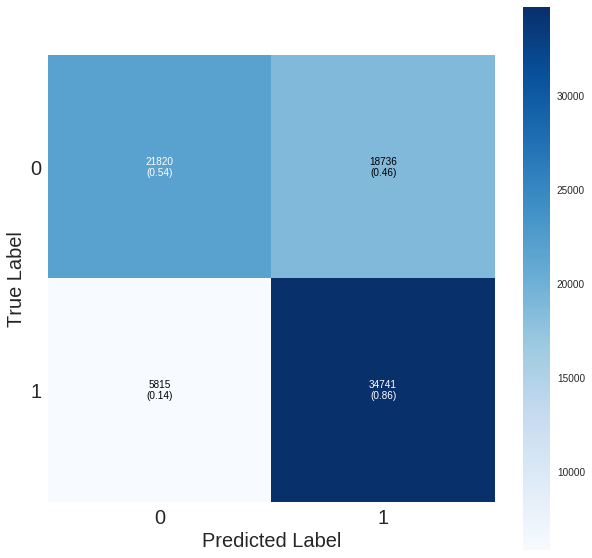

In [0]:
# Plot Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix

Confusion_Matrix_plot = np.array([[21820,18736],
                   [5815, 34741]])

fig, ax = plot_confusion_matrix(conf_mat=Confusion_Matrix_plot, show_absolute=True, show_normed=True, colorbar=True, figsize=(10,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.show()


From the confusion matrix plot, each row in the plot represents an actual class and each column represents a predicted class.

The first row of the matrix considers unsuccessful artists, the negative class: 21820 of them were correctly classifed as unsuccessful (true negatives), while the remaining 18736 were wrongly classified as successful (false positive).

The second row considers the successful artists, the positive class: 5815 were wrongly classified as unsuccessful (false positive), while the remaining 34741 were correcty classified as successful (true positives).

In the classification report, the F1 score is the weighted average of the precision and recall. As the F1 score for class 1 is higher than class 2 and the F1 score for class 1 is close to 1, it suggests that the classifier is more accurate in classifying the data points in the class 1. In other words, the classifier can predict successful in a higher quality.

### ROC Curve 

Receiver Operating Characteristic (ROC) curves show the ability of the model to classify subjects correctly across a range of decision thresholds, i.e. it plots the True Positive Rate vs. False Positive Rate at every probability threshold. 

The AUC summarizes the results of an ROC – it is the probability that a randomly chosen ‘success’ example has a higher probability of being a success than a randomly chosen ‘failure’ example. A random classification would yield an AUC of 0.5, and a perfectly accurate one would yield 1.


In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

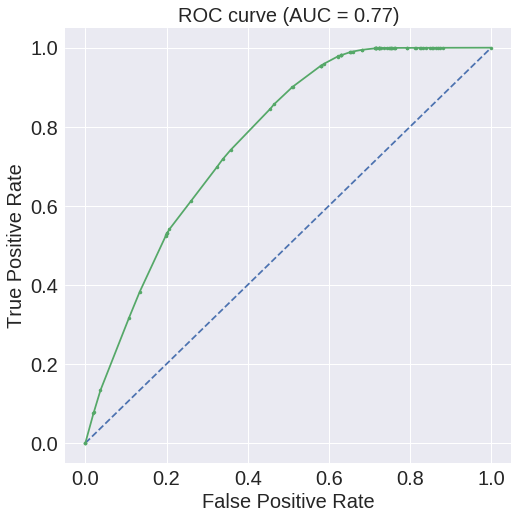

In [0]:
# predict probabilities
probs = clf_dt.predict_proba(x_validation)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_validation, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_validation, probs)

# plot the roc curve for the model
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC curve (AUC = %0.2f)' % auc, fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now that you have a validated model, we can potentially analyze the features of the model, to understand which ones have had the most impact on predicting an artist’s success. 

To do this, we can plot the feature importance as determined by the classifier:

In [0]:
# Feature importance analysis 
feature_importances = pd.DataFrame(clf_dt.feature_importances_,
                                   index = ['passion_score','playlist_avg_passion_score','f_percentage','1867-1897','1898-1928','1929-1959','1991-2021','pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'],
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
1991-2021,0.319392
pca_1,0.205696
1898-1928,0.111037
f_percentage,0.095210
1929-1959,0.080882
passion_score,0.049201
playlist_avg_passion_score,0.034735
pca_8,0.033262
pca_3,0.018324
pca_7,0.016148


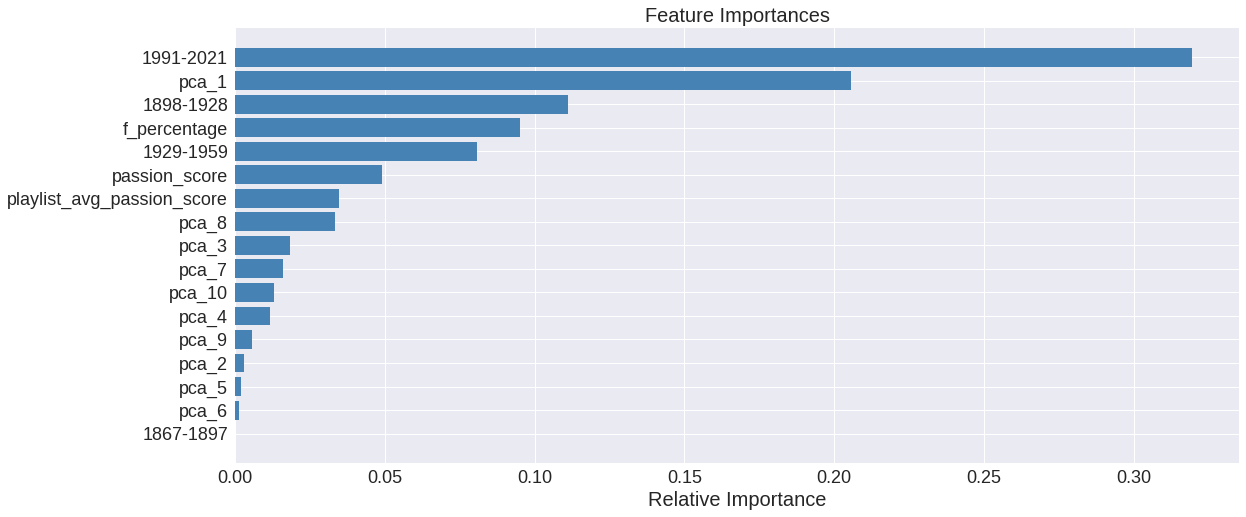

In [0]:
features = ['passion_score','playlist_avg_passion_score','f_percentage','1867-1897','1898-1928','1929-1959','1991-2021','pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10']
importances = clf_dt.feature_importances_
indices = np.argsort(importances)

#plot feature importance
plt.figure(figsize=(18, 8))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center', color='steelblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

From the plot above, the top 5 most-important features for the model are 1991-2021, pca_1, 1929-1959, f_percentage, and playlist_avg_passion_score.

## Summary 

Overall, there are 17 features generated from the original dataset. These features account for a range of factors including listener profile, region distribution, artist passion score, and playlist passion score. A decision tree classifier is eventually chosen to be the best model for the input dataset with a validation accuracy of 0.697. The confusion matrix of the classifier reveals that the classifier can predict successful in a higher quality.

Future work can be done to improve performance by re-training the model with the top 5 most-important features as well as other newly created features.

# References:

Hands-On Machine Learning with Scikit-Learn and TensorFlow (By Aurélien Géron)


Ensemble Machine Learning Algorithms in Python with scikit-learn 

https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

scikit-learn

https://scikit-learn.org/stable/index.html

A Comprehensive Guide to Ensemble Learning (with Python codes)

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

What is LightGBM, How to implement it? How to fine tune the parameters?

https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

Matplotlib

https://matplotlib.org/index.html

seaborn

https://seaborn.pydata.org/index.html

Dealing with multicollinearity

https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity

How and When to Use ROC Curves and Precision-Recall Curves for Classification in Python

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Your First Machine Learning Project in Python Step-By-Step

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

How to Tune Algorithm Parameters with Scikit-Learn

https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

Machine Learning Model Evaluation & Selection

https://heartbeat.fritz.ai/model-evaluation-selection-i-30d803a44ee

Essentials of Machine Learning Algorithms (with Python and R Codes)

https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

Resampling strategies for imbalanced datasets

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

pandas 0.24.1 documentation

https://pandas.pydata.org/pandas-docs/stable/index.html

Confusion Matrix

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

Create Random Forests Plots in Python with scikit-learn

http://www.agcross.com/2015/02/random-forests-scikit-learn/